<a href="https://colab.research.google.com/github/rushikeshw791/Support-Vector-Machines/blob/main/SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**support vector machines assignment**

Q.1 Prepare a classification model using SVM for salary data

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Training Dataset
train=pd.read_csv("https://github.com/rushikeshw791/Support-Vector-Machines/files/10083348/SalaryData_Train.1.csv")

In [ ]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Data Description:

1. age -- age of a person
2. workclass	-- A work class is a grouping of work 
3. education	-- Education of an individuals	
4. maritalstatus -- Marital status of an individulas	
5. occupation	 -- occupation of an individuals
6. relationship -- 	
7. race --  Race of an Individual
8. sex --  Gender of an Individual
9. capitalgain --  profit received from the sale of an investment	
10. capitalloss	-- A decrease in the value of a capital asset
11. hoursperweek -- number of hours work per week	
12. native -- Native of an individual
13. Salary -- salary of an individual

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Importing Testing Dataset
test=pd.read_csv("https://github.com/rushikeshw791/Support-Vector-Machines/files/10083349/SalaryData_Test.1.csv")

In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


EDA

In [ ]:
train.shape

(30161, 14)

In [ ]:
test.shape

(15060, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [ ]:
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [ ]:
# count the duplicate rows
train[train.duplicated()].shape

(3258, 14)

In [ ]:
# count the duplicate rows
test[test.duplicated()].shape

(930, 14)

In [ ]:
# print the duplicate rows
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
# print the duplicate rows
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
# Merging Train and Test Data
raw_data = train.append(test)
raw_data.reset_index(inplace=True,drop=True)
raw_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(45221, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [ ]:
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
  raw_data[raw_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [ ]:
raw_data[raw_data.duplicated()].shape

(5982, 14)

In [ ]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count: {}'.format(len(continuous_feature)))

Continuous Feature Count: 4


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

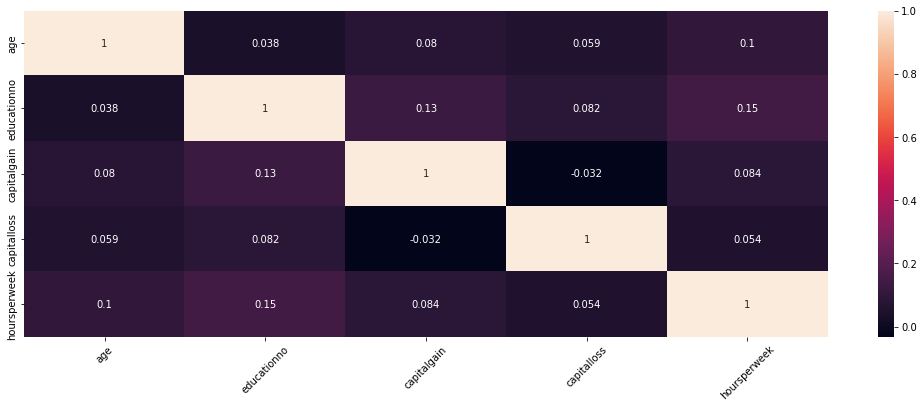

In [ ]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

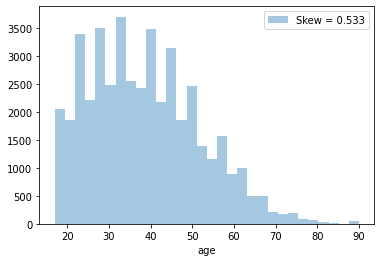

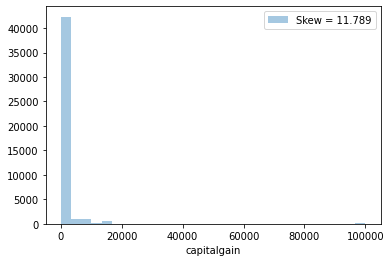

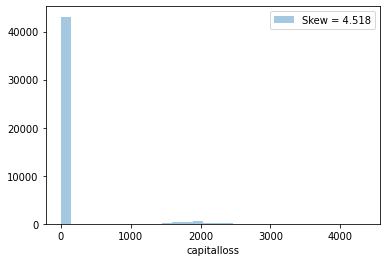

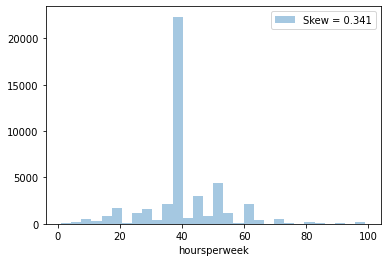

In [ ]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Text(0.5, 1.0, 'Working Class')

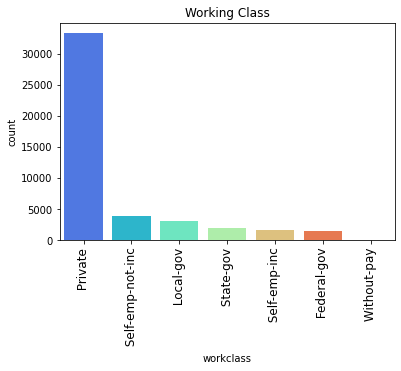

In [ ]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal, 
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

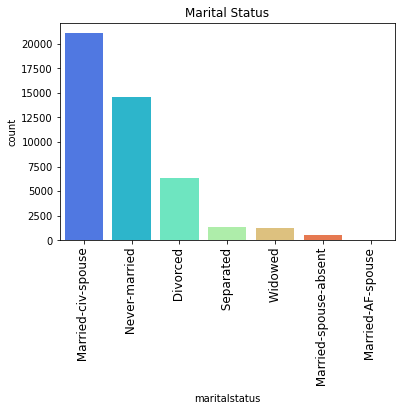

In [ ]:
sns.countplot(x='maritalstatus', data=raw_data, palette = pal, 
              order=raw_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

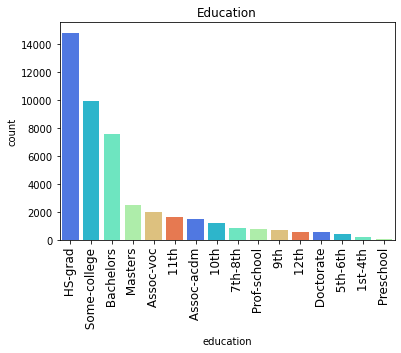

In [ ]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

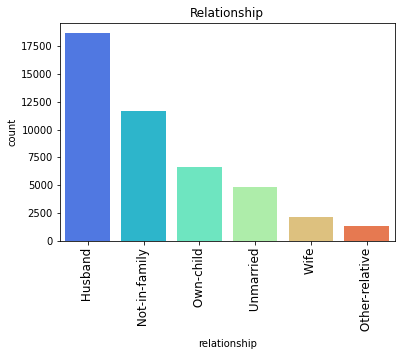

In [ ]:
sns.countplot(x='relationship', data=raw_data, palette = pal, 
              order=raw_data['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Sex')

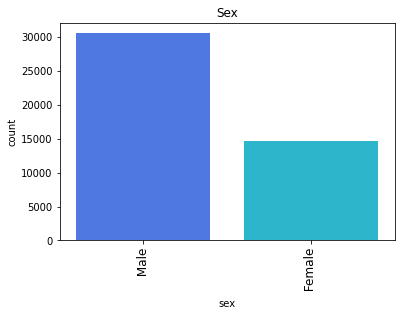

In [ ]:
sns.countplot(x='sex', data=raw_data, palette = pal, 
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

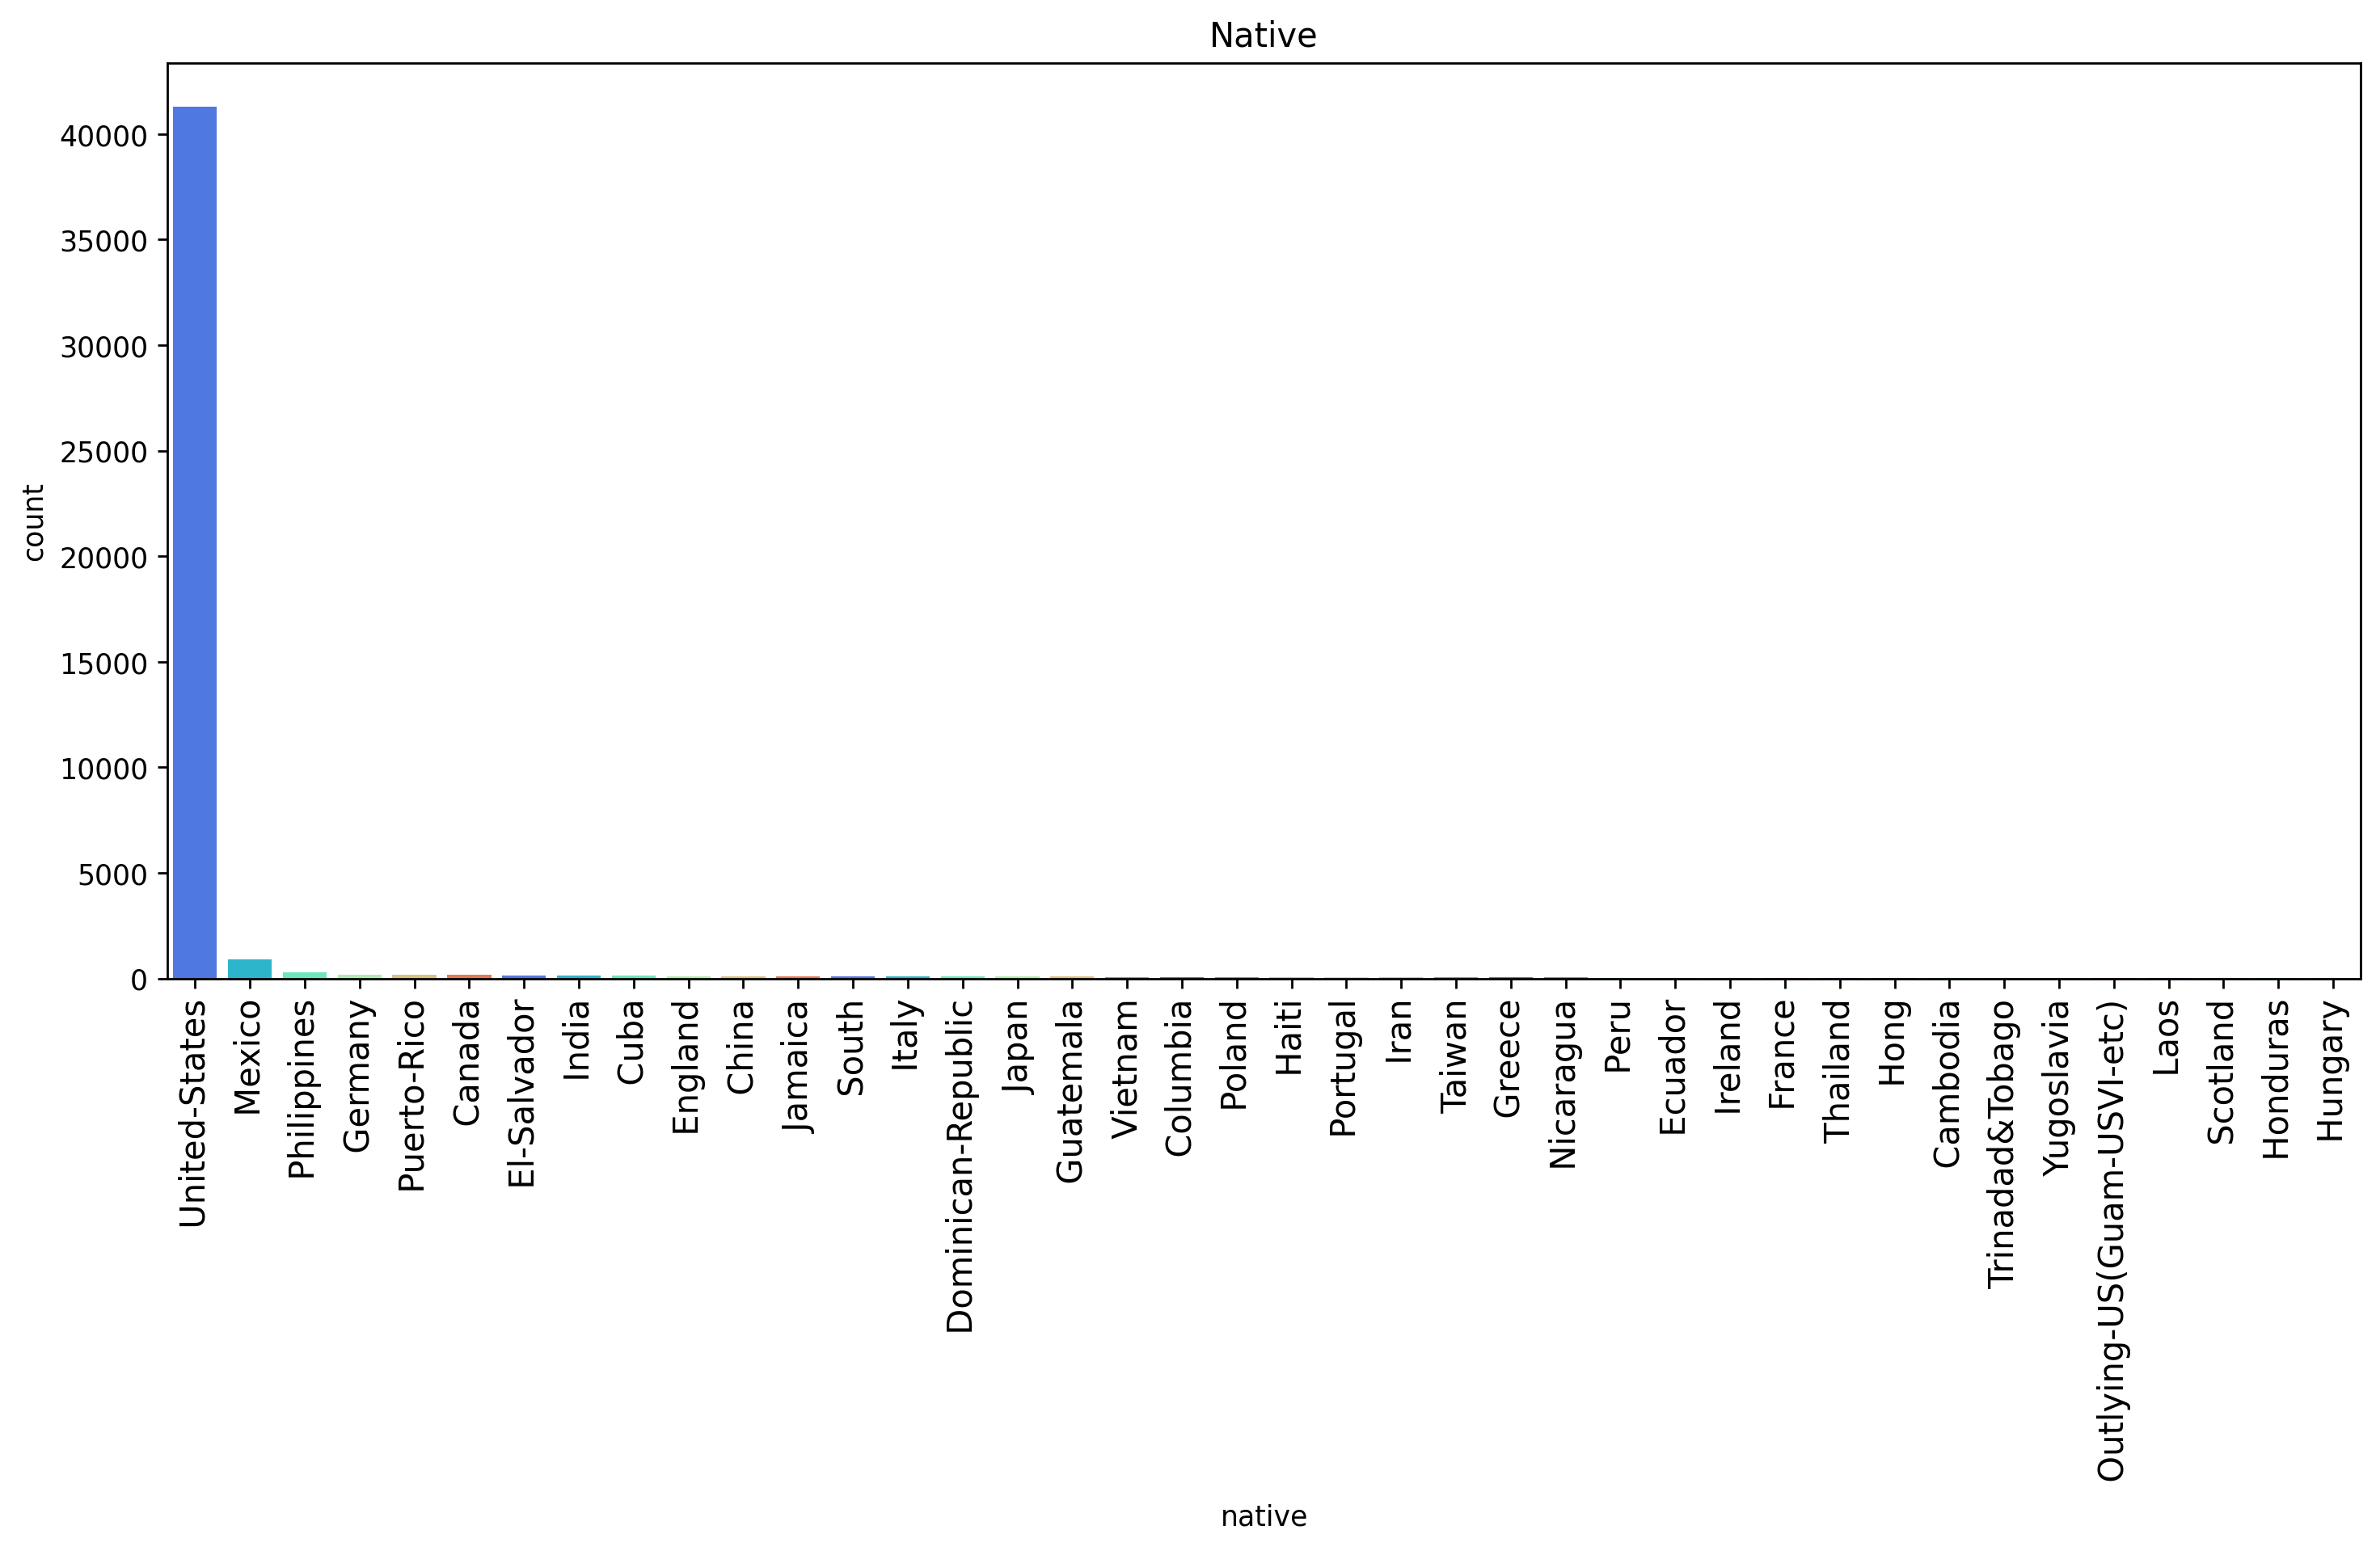

In [ ]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=raw_data, palette = pal, 
              order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

In [ ]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [ ]:
LE = LabelEncoder()
for i in string_columns:
        train[i]= LE.fit_transform(train[i])
        test[i]=LE.fit_transform(test[i])

In [ ]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [ ]:
train.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [ ]:
test.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

**Model Building**

In [ ]:
X_train = train.iloc[:,0:13]
Y_train = train.iloc[:,13]
X_test = test.iloc[:,0:13]
Y_test = test.iloc[:,13]

In [ ]:
#Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
X_train = norm_func(X_train)
X_test =  norm_func(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(30161, 13)
(15060, 13)
(30161,)
(15060,)


**Model Training**

In [ ]:
svc_model=SVC()

In [ ]:
svc_model.fit(X_train,Y_train)

SVC()

**Model Testing**


In [ ]:
y_train_pred=svc_model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test_pred=svc_model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 1, 0, 1])

**Model Evaluation**

Training Data

In [ ]:
print(confusion_matrix(Y_train,y_train_pred))

[[21342  1311]
 [ 3378  4130]]


In [ ]:
print(classification_report(Y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22653
           1       0.76      0.55      0.64      7508

    accuracy                           0.84     30161
   macro avg       0.81      0.75      0.77     30161
weighted avg       0.84      0.84      0.84     30161



In [ ]:
print("AUC Score: ",round(roc_auc_score(Y_train,y_train_pred),4))

AUC Score:  0.7461


Testing Data

In [ ]:
print(confusion_matrix(Y_test,y_test_pred))

[[10664   696]
 [ 1664  2036]]


In [ ]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.75      0.55      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.81      0.74      0.77     15060
weighted avg       0.84      0.84      0.83     15060



In [ ]:
print("AUC Score: ",round(roc_auc_score(Y_test,y_test_pred),4))

AUC Score:  0.7445


Training Accuracy-84%

Testing Accuracy-84%

**Linear kernel**

In [ ]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,Y_train)
pred_test_linear = model_linear.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test_linear))

Accuracy: 0.8098273572377158


**Polynomial kernel**

In [ ]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,Y_train)
pred_test_poly = model_poly.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test_poly))

Accuracy: 0.8435590969455511


**RBF Kernel**

In [ ]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,Y_train)
pred_test_rbf = model_rbf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


**Sigmoid Kernel**

In [ ]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(X_train,Y_train)
pred_test_sigmoid = model_sigmoid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


**Accuracy of polynomial kernel is maximum.**


**Q.2 Forestfires dataset**

Classify the Size_Categorie using SVM.

In [ ]:
data = pd.read_csv("https://github.com/rushikeshw791/Support-Vector-Machines/files/10083336/forestfires.1.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


1. month	month of the year: 'jan' to 'dec'
2. day	day of the week: 'mon' to 'sun'
3. FFMC	FFMC index from the FWI system: 18.7 to 96.20
4. DMC	DMC index from the FWI system: 1.1 to 291.3
5. DC	DC index from the FWI system: 7.9 to 860.6
6. ISI	ISI index from the FWI system: 0.0 to 56.10
7. temp	temperature in Celsius degrees: 2.2 to 33.30
8. RH	relative humidity in %: 15.0 to 100
9. wind	wind speed in km/h: 0.40 to 9.40
10. rain	outside rain in mm/m2 : 0.0 to 6.4
11. Size_Categorie 	the burned area of the forest ( Small , Large)

**EDA**

In [ ]:
data.shape

(517, 31)

In [ ]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [ ]:
data[data.duplicated()].shape

(8, 31)

In [ ]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
data[data.columns[0:11]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    object 
 1   day     517 non-null    object 
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.6+ KB


In [ ]:
data[data.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
data[data.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


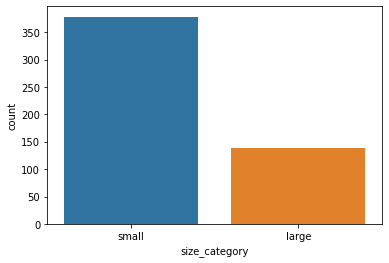

In [ ]:
sns.countplot(x='size_category',data=data)
plt.xlabel('size_category')
plt.ylabel('count')
plt.show()

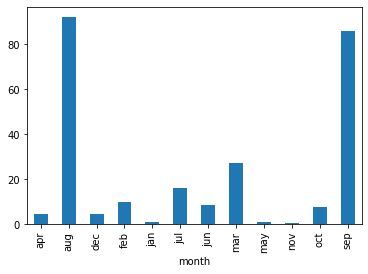

In [ ]:
pd.crosstab(data['size_category'],data['month']).mean().plot(kind='bar')

In [ ]:
dfa = data[data.columns[0:10]]
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

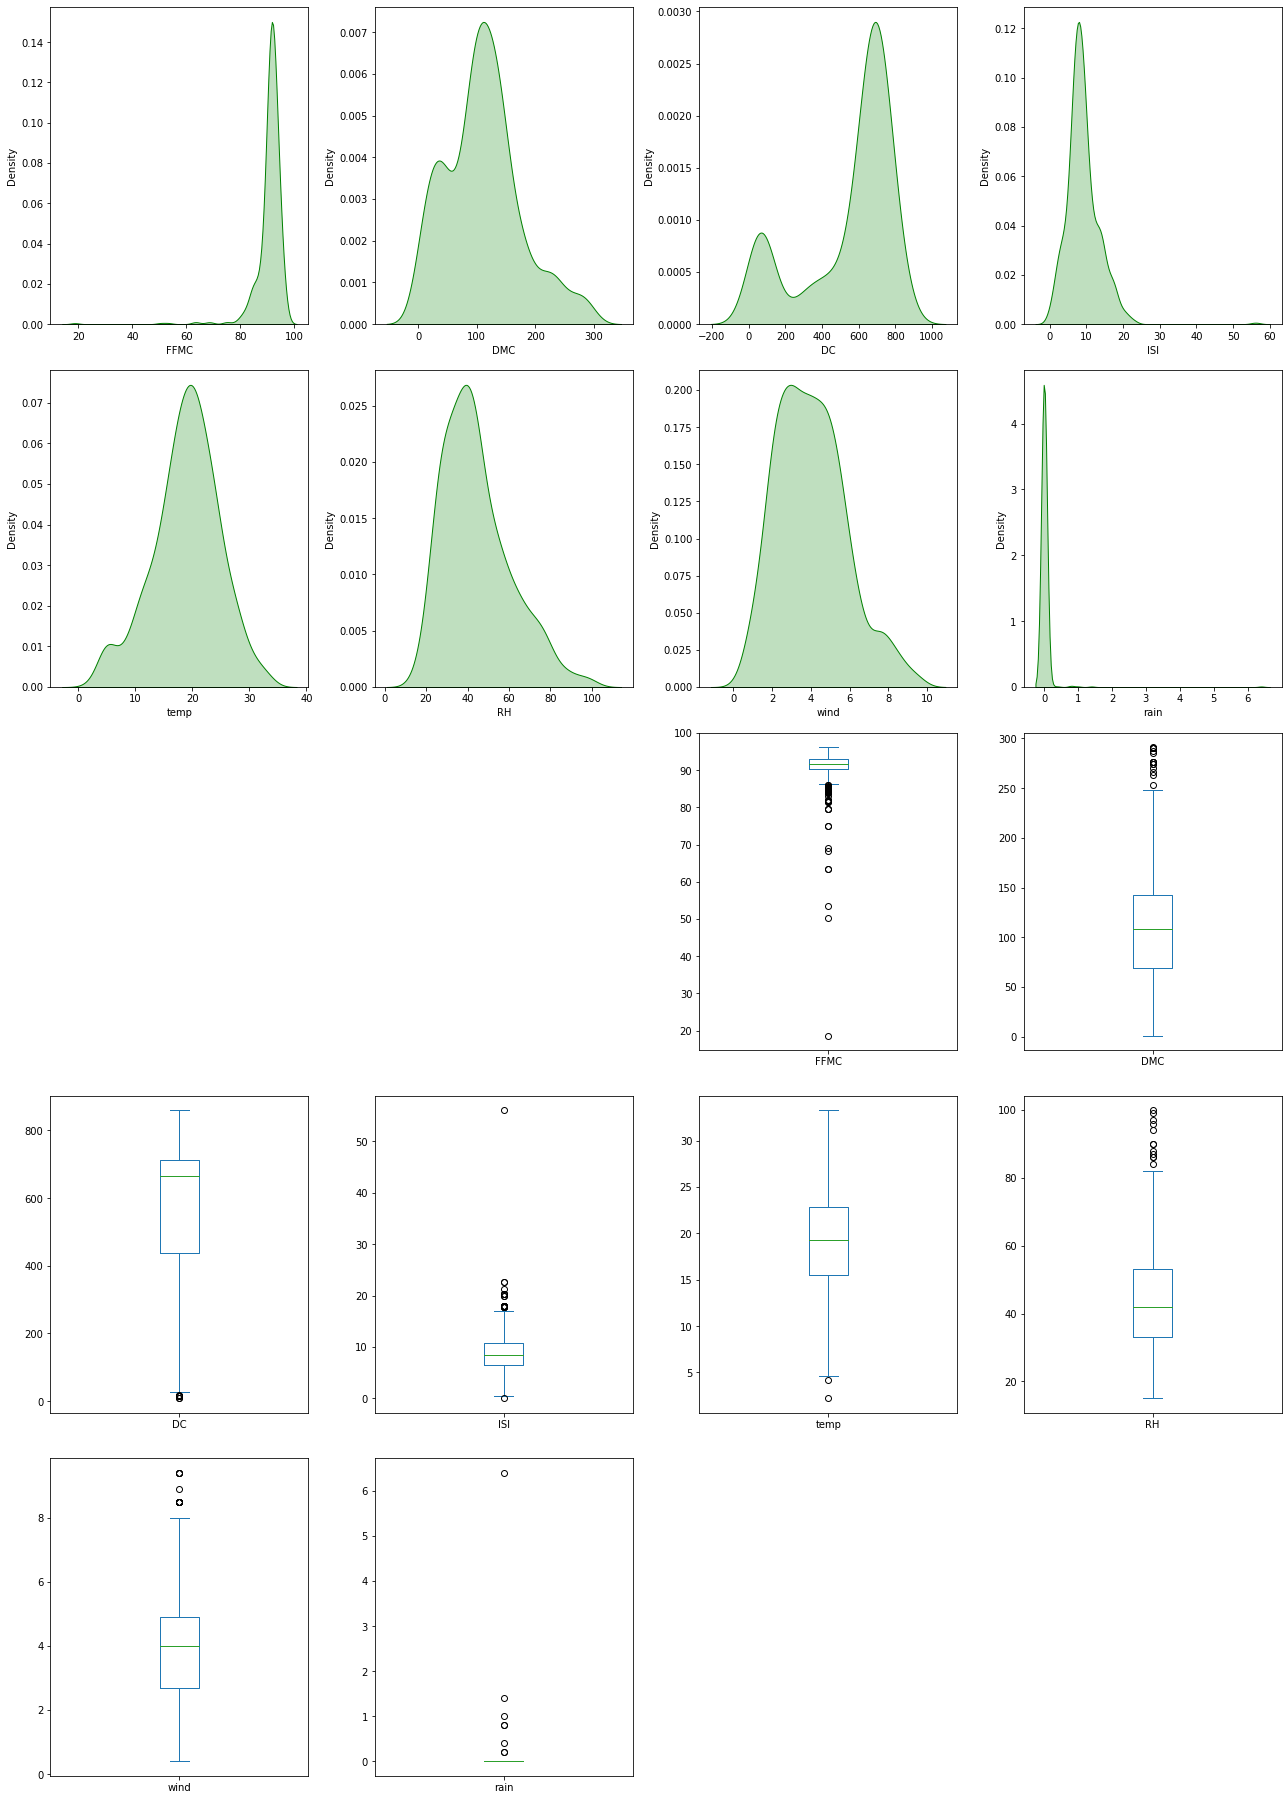

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

**SVM**

In [ ]:
X = data.iloc[:,2:30]
y = data.iloc[:,30]

In [ ]:
mapping = {'small': 1, 'large': 2}

In [ ]:
y = y.replace(mapping)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, stratify = y)

In [ ]:
svc_model=SVC()

In [ ]:
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
y_train_pred1=svc_model.predict(x_train)
y_train_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_test_pred1=svc_model.predict(x_test)
y_test_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Model Evaluation**

Training data

In [ ]:
print(confusion_matrix(y_train,y_train_pred1))

[[302   0]
 [100  11]]


In [ ]:
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86       302
           2       1.00      0.10      0.18       111

    accuracy                           0.76       413
   macro avg       0.88      0.55      0.52       413
weighted avg       0.82      0.76      0.68       413



Testing data

In [ ]:
print(confusion_matrix(y_test,y_test_pred1))

[[76  0]
 [26  2]]


In [ ]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           1       0.75      1.00      0.85        76
           2       1.00      0.07      0.13        28

    accuracy                           0.75       104
   macro avg       0.87      0.54      0.49       104
weighted avg       0.81      0.75      0.66       104



Training Accuracy- 76%

Testing Accuracy- 74%

**Linear Kernel**

In [ ]:
model_linear1 = SVC(kernel = "linear")
model_linear1.fit(x_train,y_train)
pred_test_linear1 = model_linear1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear1))

Accuracy: 0.9807692307692307


**Polynomial Kernel**

In [ ]:
model_poly1 = SVC(kernel = "poly")
model_poly1.fit(x_train,y_train)
pred_test_poly1 = model_poly1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly1))

Accuracy: 0.7596153846153846


**RBF Kernel**

In [ ]:
model_rbf1 = SVC(kernel = "rbf")
model_rbf1.fit(x_train,y_train)
pred_test_rbf1 = model_rbf1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf1))

Accuracy: 0.75


**Sigmoid Kernel**

In [ ]:
model_sigmoid1 = SVC(kernel = "sigmoid")
model_sigmoid1.fit(x_train,y_train)
pred_test_sigmoid1 = model_sigmoid1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid1))

Accuracy: 0.7115384615384616


Here Accuracy of linear kernel is maximum.